<a href="https://colab.research.google.com/github/evukich/Predicting-Fetal-Health-Outcomes-by-CTG-data-/blob/main/Fetal_Health%20Data%20Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Improving neonatal viability through the use of CTG dataset and machine learning models

###Data set: CTG Fetal Health Classification: 
https://www.kaggle.com/andrewmvd/fetal-health-classification

This dataset shows Cardiotocagraph data (fetal monitor) in relation to fetal health classified as Normal, Suspect or Pathological.

The aim of this project was to build and compare machine learning models that can automate and predict fetal health outcomes and improve perinatal medical care and neonatal viability.

Rationale: 
Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.
The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:

1 Normal
2 Suspect
3 Pathological

Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318 (link)



1) Source of data

  Located on Kaggle, fetal health data originating from this research: 
  Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318

2) Brief description of data

  2126 measurements extracted from cardiotocograms and classified by expert obstetricians.

  The data pertains to fetal viability in relation to heart rate, fetal movements, variability etc.

3) What is the target?

  The target is fetal_health:  
  Fetal health: 1 - Normal 2 - Suspect 3 - Pathological

4) Is this a classification or regression problem?

  I believe this is a classification problem as these indicators will be clustered to predict the fetal health. 

5) How many features?

  21

6) How many rows of data.

  2126



In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config
set_config(display='diagram')
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
filename = '/content/fetal_health.csv'
df = pd.read_csv(filename)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [ ]:
df.isnull().sum()

#No missing values

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [ ]:
df.duplicated().sum()



13

In [ ]:
#13 Duplicated rows will be dropped

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.duplicated().sum()

0

Removing unnecessary columns

In [ ]:
df.drop(columns = ['histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency' ], inplace = True)

In [ ]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,1.0


### Produce univariate visualizations to explore the target and corresponding features / Checking for Outliers



In [ ]:
df['fetal_health'].value_counts()

1.0    1646
2.0     292
3.0     175
Name: fetal_health, dtype: int64

Text(0.5, 1.0, 'Fetal Health Distribution')

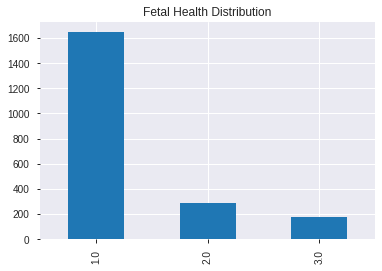

In [ ]:
df['fetal_health'].value_counts().plot(kind='bar');
plt.title('Fetal Health Distribution')


Text(0.5, 1.0, 'Baseline Fetal Heart Rate FHR Distribution')

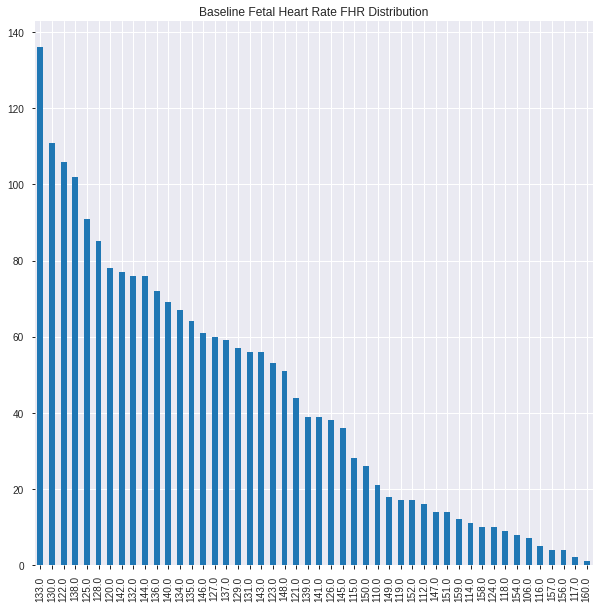

In [ ]:
plt.figure(figsize=(10,10))
df['baseline value'].value_counts().plot(kind='bar');
plt.title('Baseline Fetal Heart Rate FHR Distribution')
#Baseline Fetal Heart Rate (FHR)

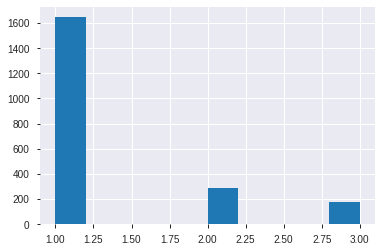

In [ ]:
df['fetal_health'].hist();

Text(0.5, 1.0, 'Number of accelerations per second Distribution')

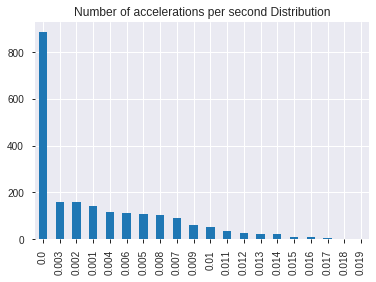

In [ ]:
df['accelerations'].value_counts().plot(kind='bar');
plt.title('Number of accelerations per second Distribution')
#Number of accelerations per second

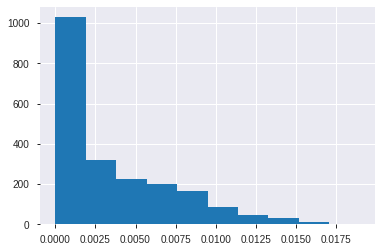

In [ ]:
df['accelerations'].hist();

Text(0.5, 1.0, 'Number of fetal movements per second Distribution')

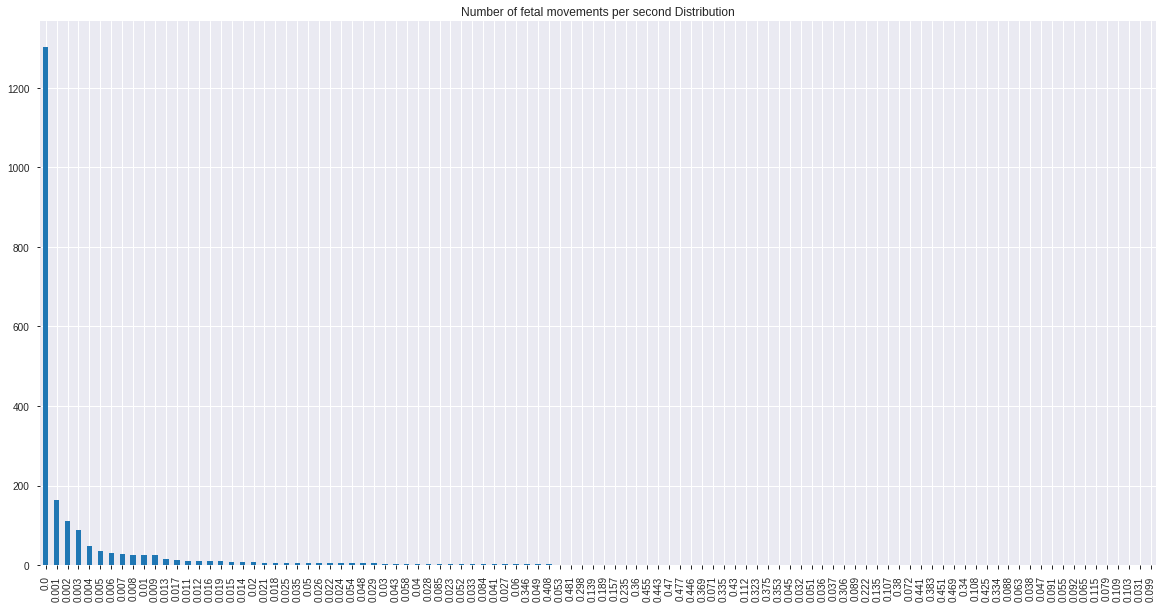

In [ ]:
plt.figure(figsize=(20,10))

df['fetal_movement'].value_counts().plot(kind='bar');
plt.title('Number of fetal movements per second Distribution')
#Number of fetal movements per second

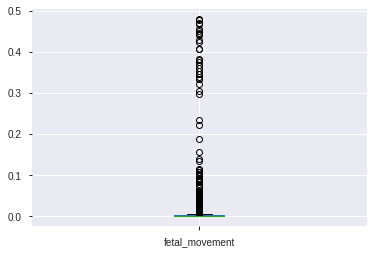

In [ ]:
df.boxplot(column = 'fetal_movement');

Text(0.5, 1.0, 'Number of uterine contractions per second Distribution')

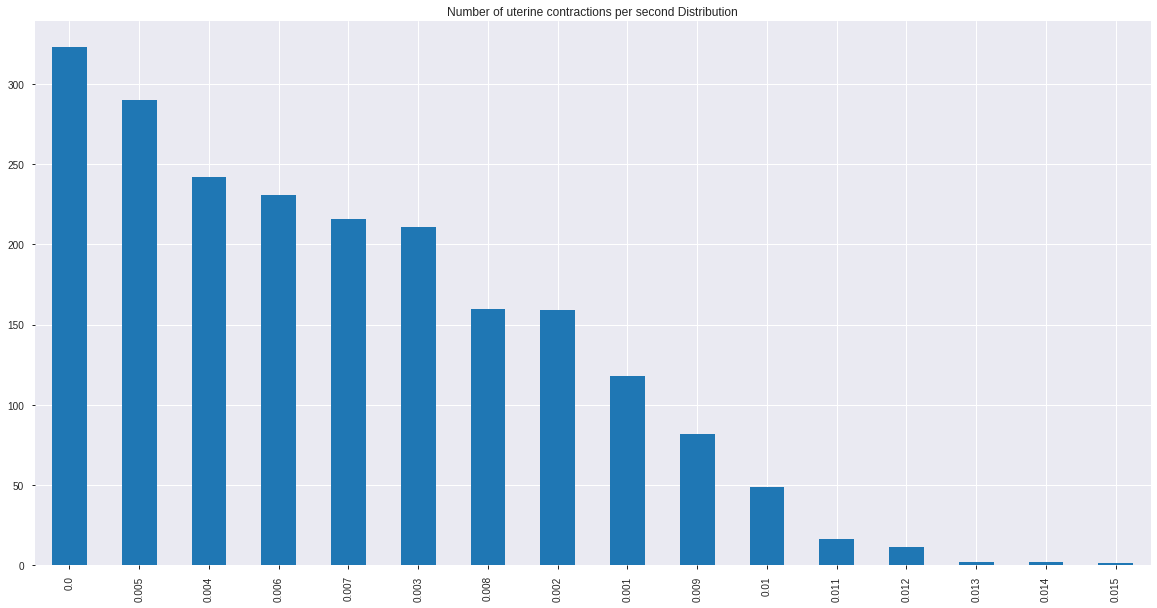

In [ ]:
#Number of uterine contractions per second
plt.figure(figsize=(20,10))
df['uterine_contractions'].value_counts().plot(kind='bar');
plt.title('Number of uterine contractions per second Distribution')

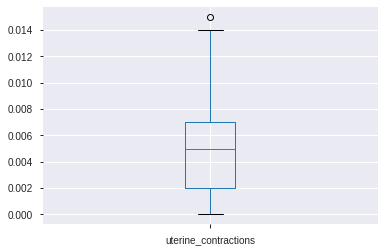

In [ ]:
df.boxplot(column = 'uterine_contractions');

Text(0.5, 1.0, 'Number of LDs per second Distribution')

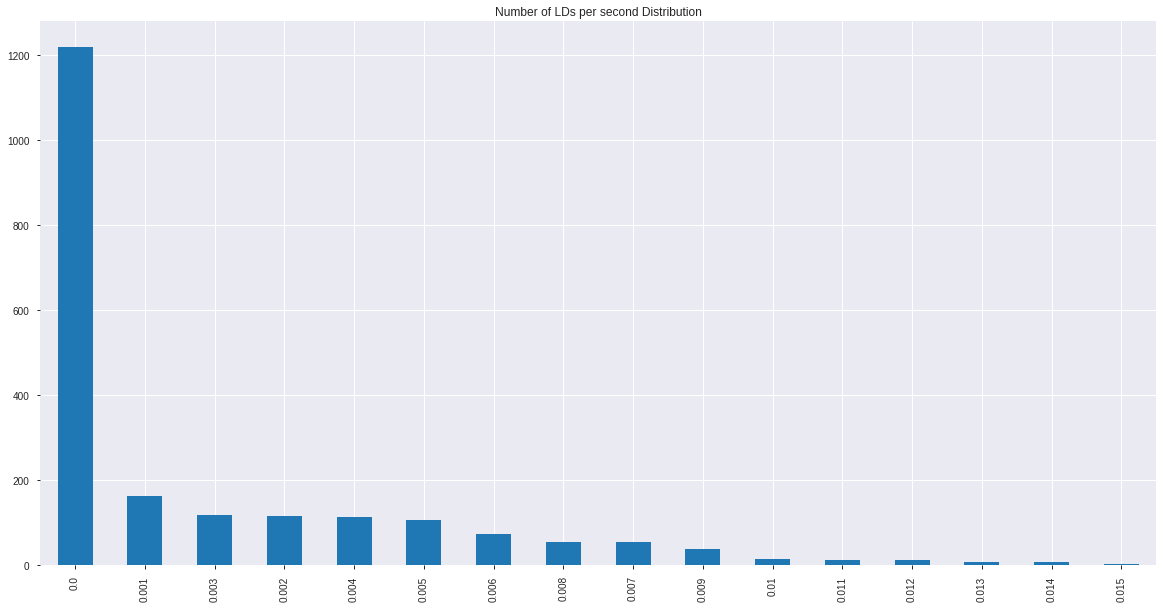

In [ ]:
#Number of LDs per second
plt.figure(figsize=(20,10))
df['light_decelerations'].value_counts().plot(kind='bar');
plt.title('Number of LDs per second Distribution')

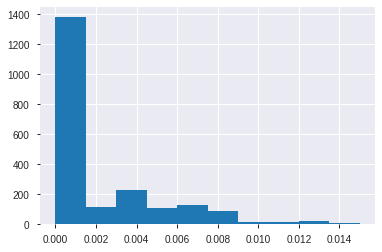

In [ ]:
df['light_decelerations'].hist();

Text(0.5, 1.0, 'Number of SDs per second Distribution')

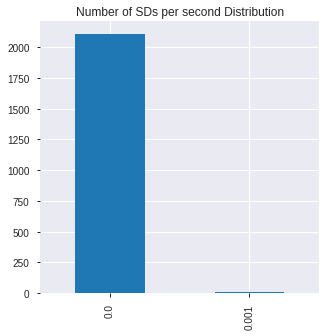

In [ ]:
#Number of SDs per second
plt.figure(figsize=(5,5))
df['severe_decelerations'].value_counts().plot(kind='bar');
plt.title('Number of SDs per second Distribution')

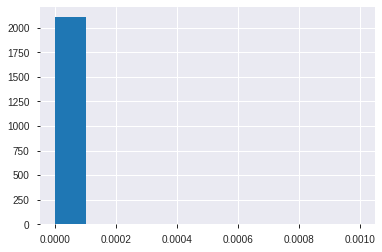

In [ ]:
df['severe_decelerations'].hist();

Text(0.5, 1.0, 'Number of PDs per second Distribution')

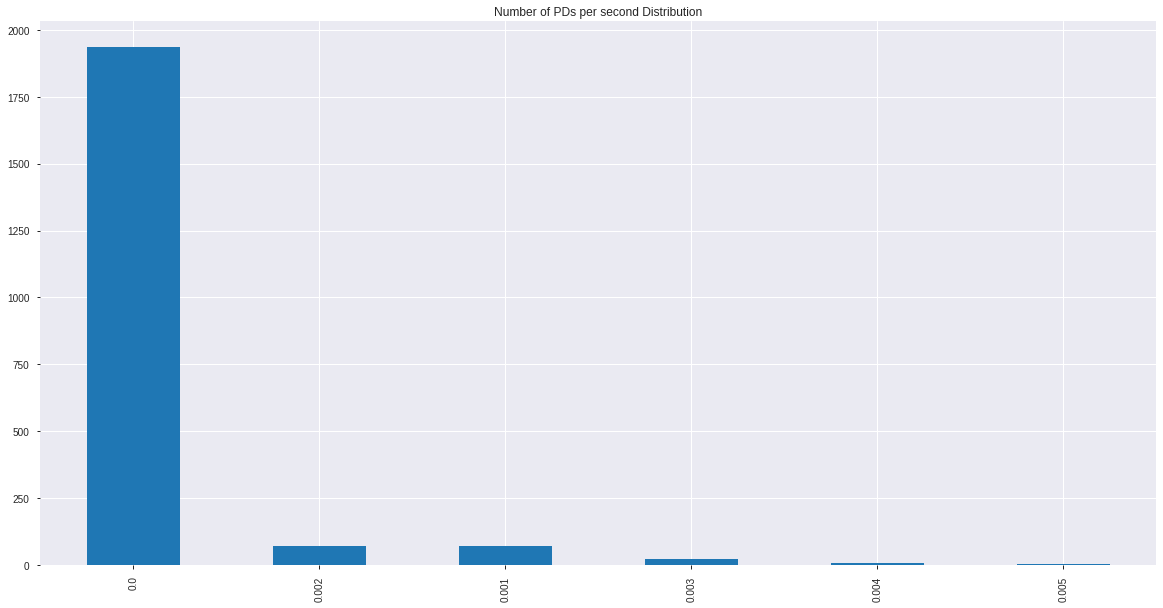

In [ ]:
#Number of PDs per second
plt.figure(figsize=(20,10))
df['prolongued_decelerations'].value_counts().plot(kind='bar');
plt.title('Number of PDs per second Distribution')

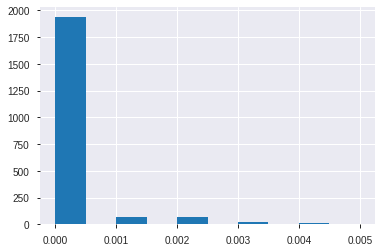

In [ ]:
df['prolongued_decelerations'].hist();

Text(0.5, 1.0, 'Percentage of time with abnormal short term variability Distribution')

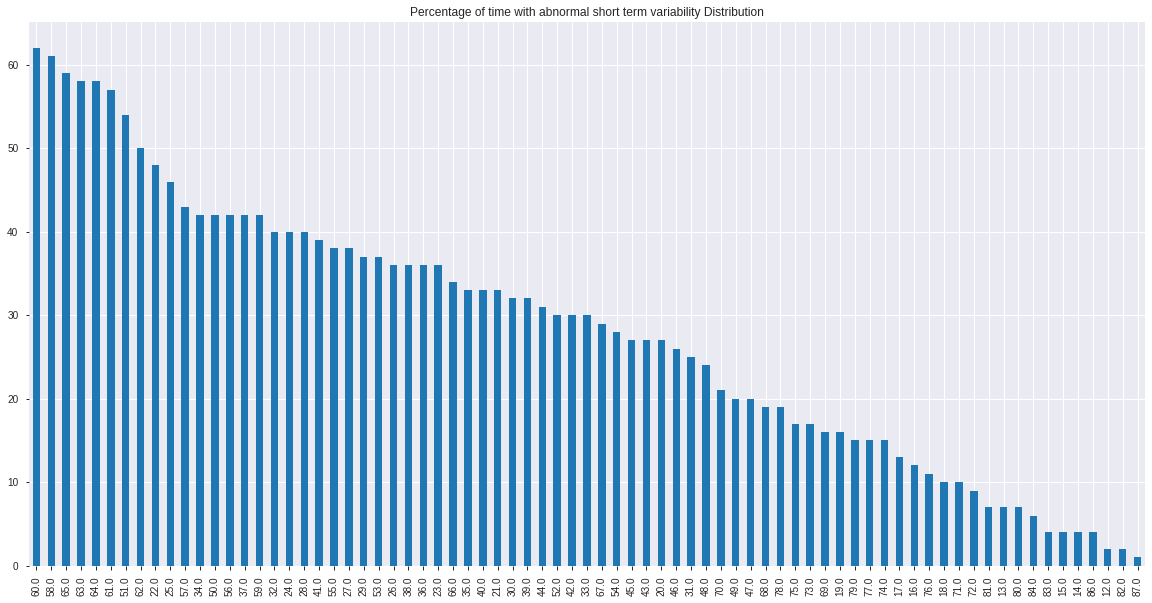

In [ ]:
#Percentage of time with abnormal short term variability
plt.figure(figsize=(20,10))
df['abnormal_short_term_variability'].value_counts().plot(kind='bar');
plt.title('Percentage of time with abnormal short term variability Distribution')

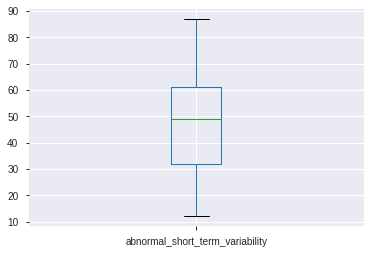

In [ ]:
df.boxplot(column = 'abnormal_short_term_variability');

Text(0.5, 1.0, 'Mean value of short term variability Distribution')

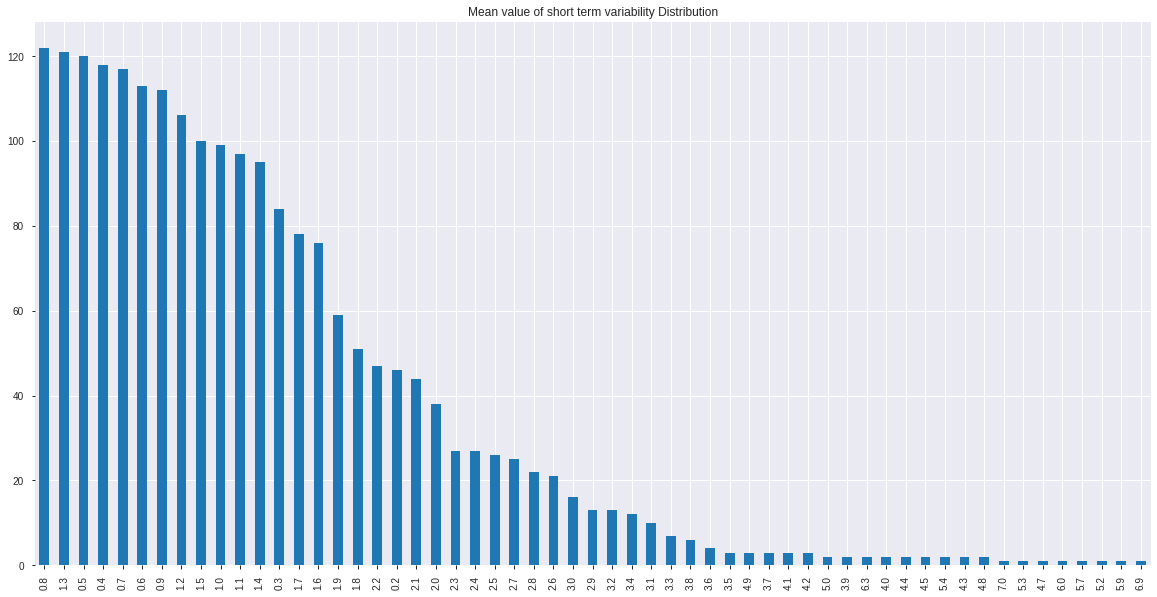

In [ ]:
#Mean value of short term variability
plt.figure(figsize=(20,10))
df['mean_value_of_short_term_variability'].value_counts().plot(kind='bar');
plt.title('Mean value of short term variability Distribution')

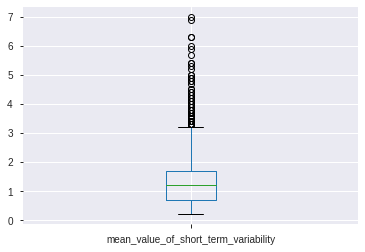

In [ ]:
df.boxplot(column = 'mean_value_of_short_term_variability');


Text(0.5, 1.0, 'Percentage of time with abnormal long term variability Distribution')

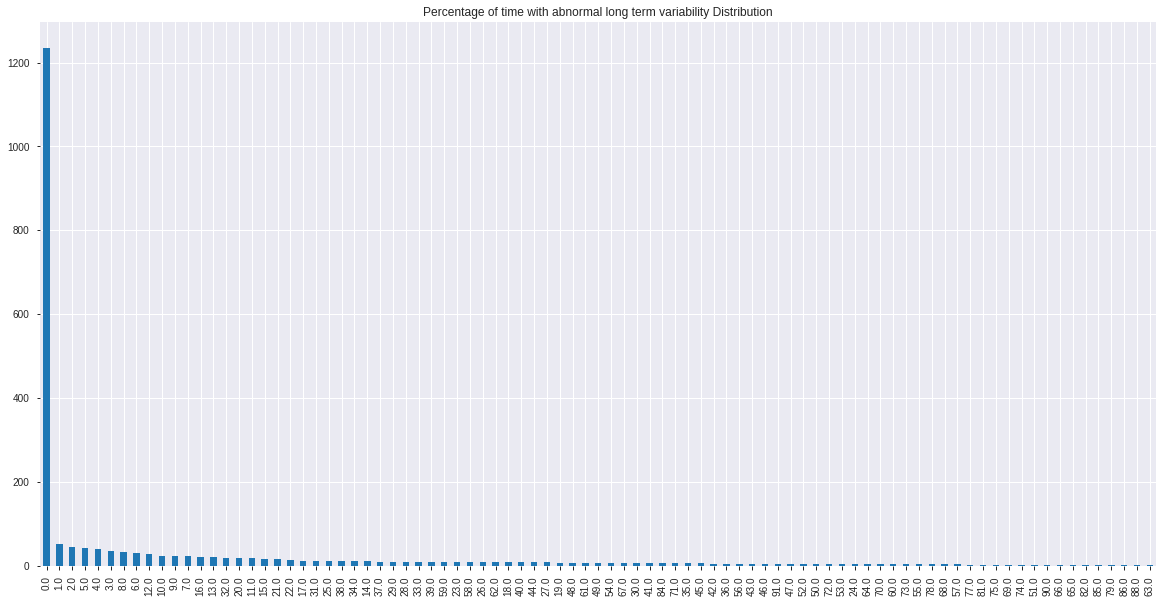

In [ ]:
#Percentage of time with abnormal long term variability
plt.figure(figsize=(20,10))
df['percentage_of_time_with_abnormal_long_term_variability'].value_counts().plot(kind='bar');
plt.title('Percentage of time with abnormal long term variability Distribution')

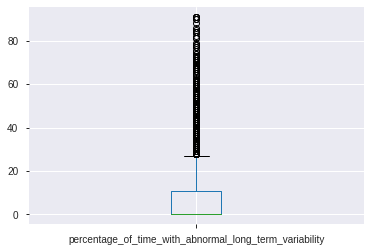

In [ ]:
df.boxplot(column = 'percentage_of_time_with_abnormal_long_term_variability');

Text(0.5, 1.0, 'Mean Value of Long term variability Distribution')

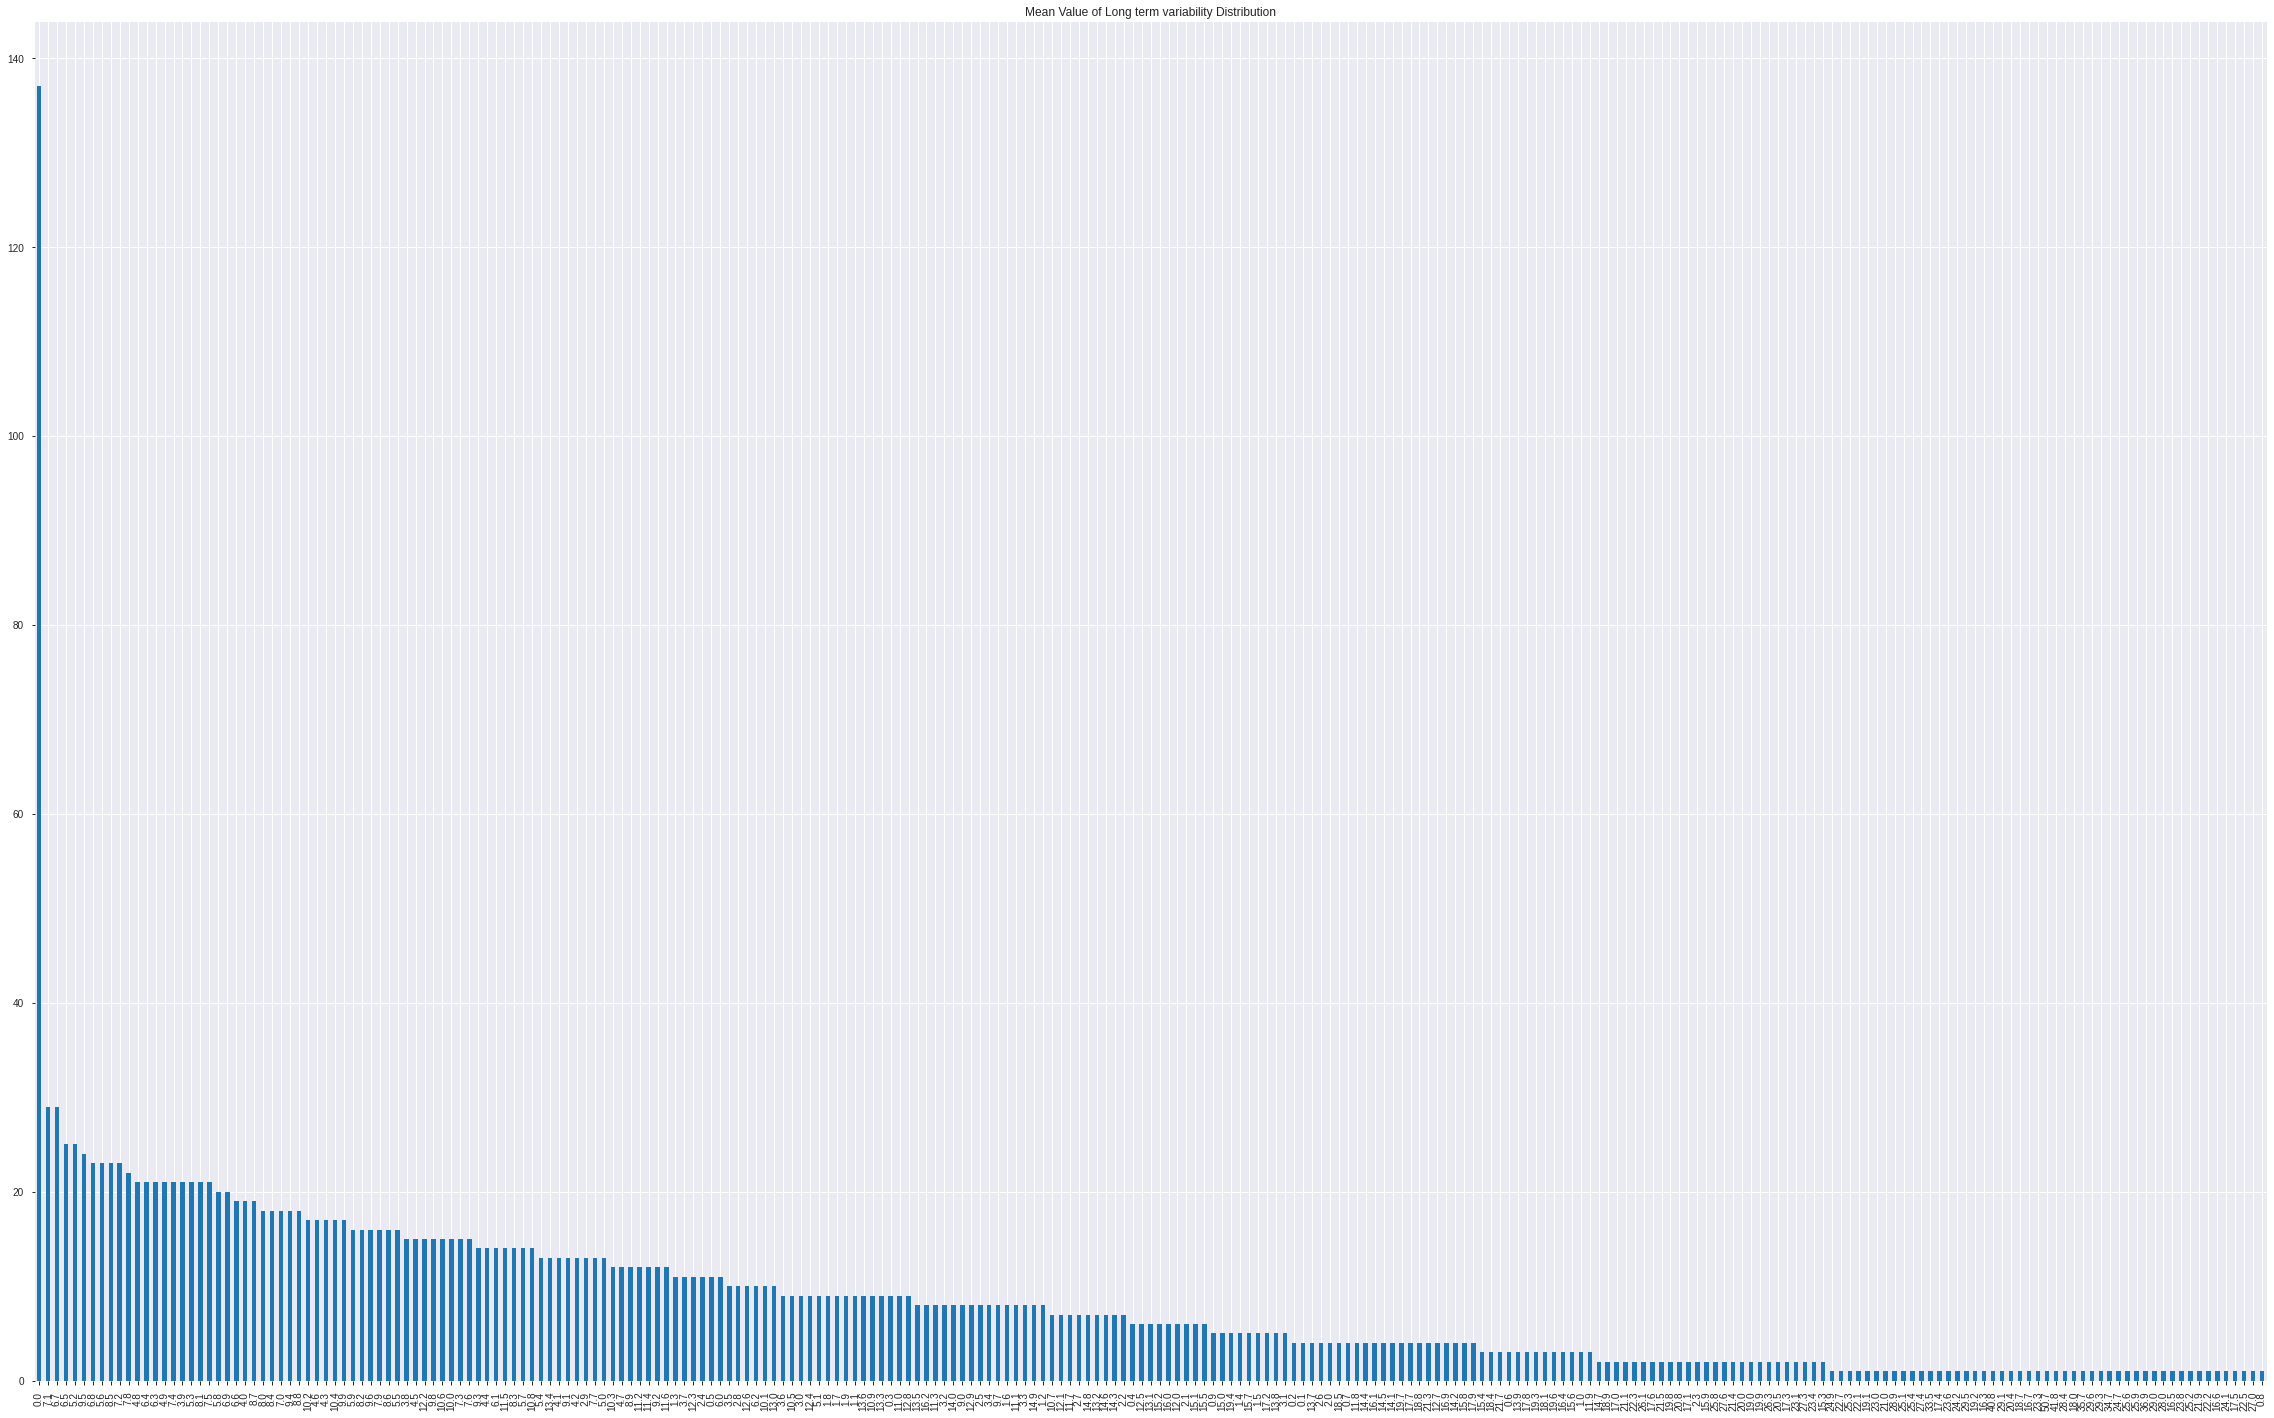

In [ ]:
#Mean Value of Long term variability 
plt.figure(figsize=(40,25))
df['mean_value_of_long_term_variability'].value_counts().plot(kind='bar');
plt.title('Mean Value of Long term variability Distribution')



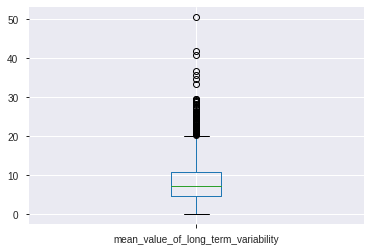

In [ ]:
df.boxplot(column = 'mean_value_of_long_term_variability');

Text(0.5, 1.0, 'Fetal Health Correlation Heat Map')

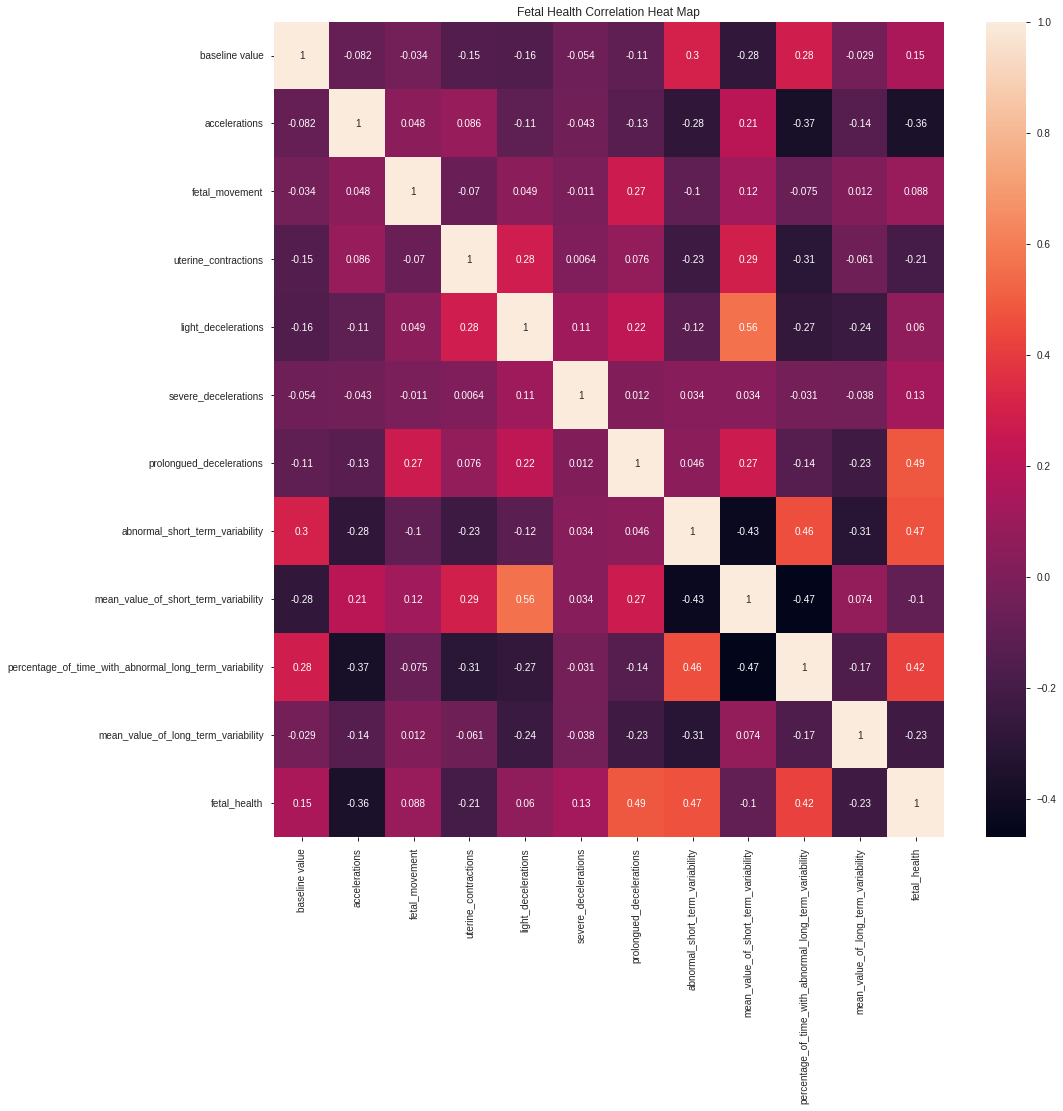

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot = True);
plt.title('Fetal Health Correlation Heat Map')

## There are apparent correlations of fetal health with FHR accelerations and percentage of time with abnormal variability. 
## All abnormal variability measures appear correlated with fetal health measures. 
## There appear to be some correlation between uterine contractions and fetal health outcomes. 